## Installing NLK and Checking Library 

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [4]:
from nltk.corpus import stopwords

In [6]:
stopwords.words('english')[:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

## Reading Unstructured Text Data

In [15]:
rawData = open('SMSSpamCollection.tsv').read()

In [16]:
rawData[:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [17]:
parsedData = rawData.replace('\t', '\n').split('\n')

In [18]:
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [19]:
labelList = parsedData[0::2]

In [23]:
textList = parsedData[1::2]

In [21]:
print(labelList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']


In [24]:
print(textList[0:5])

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [27]:
print(len(labelList))

5571


In [28]:
print(len(textList))

5570


In [25]:
import pandas as pd

In [30]:
fullCorpus = pd.DataFrame({'label':labelList[:-1], 
                          'body_list':textList
                          })
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [37]:
fullCorpus = pd.read_csv('SMSSpamCollection.tsv', 
                      sep='\t', header=None)

In [39]:
fullCorpus.columns=['label', 'body_text']
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [46]:
print('Input data has {} rows and  {} columns'.format(len(fullCorpus), 
      len(fullCorpus.columns)))

Input data has 5568 rows and  2 columns


In [52]:
# How many spam/ham are there?
print("Out of {} rows, {} are spam and {} are ham".format(
    len(fullCorpus), 
    len(fullCorpus[fullCorpus['label']=='spam']), 
    len(fullCorpus[fullCorpus['label']=='ham'])
    )
)

Out of 5568 rows, 746 are spam and 4822 are ham


In [57]:
# How much missing data there is?
print("Number of nulls in the label is {}".format(fullCorpus['label'].isnull().sum()))
      
print("Number of nulls in the body is  {}".format(fullCorpus['body_text'].isnull().sum()))

Number of nulls in the label is 0
Number of nulls in the body is  0


## Regular Expressions to Manipulate Text
`nlp`, `[j-q]`, `[j-q]+`, `[0-9]+`, `[j-q0-09]+` ===> Usage `findall()` and `split()`
- Used to identify whitespace between words/tokens
- Create delimiters or end-of-line escape characters
- Removing punctuation or numbers from the text
- Cleaning HTML tags from text

In [59]:
re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This     is a made up     string to test 2    different regex methods'
re_test_messy2 = 'This-is-a-made/up.string*to>>>>test----2"""""different-regex-methods'


In [60]:
re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [61]:
re.split('\s', re_test_messy)

['This',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [62]:
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [63]:
re.split('\s+', re_test_messy2)

['This-is-a-made/up.string*to>>>>test----2"""""different-regex-methods']

In [64]:
re.split('\W+', re_test_messy2)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [65]:
re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [66]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [67]:
re.findall('\S+', re_test_messy2)

['This-is-a-made/up.string*to>>>>test----2"""""different-regex-methods']

In [69]:
re.findall('\w+', re_test_messy2)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

## Replacing Specific String

In [70]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [75]:
re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

In [76]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [77]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep7_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [78]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', peep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

## Pre-processing Data - Cleaning Text
- **Remove punctuation**
- **Tokenization**
- **Remove stopwords**
- Lemmatize/Stem (not in every NPL pipeline though), see Note 1.

*Note 1: stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma. Linguistic processing for stemming or lemmatization is often done by an additional plug-in component to the indexing process, and a number of such components exist, both commercial and open-source.*

In [80]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv('SMSSpamCollection.tsv', '\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [81]:
data_cleaned = pd.read_csv('SMSSpamCollection_cleaned.tsv',
                          sep='\t')

data_cleaned.head()

,label,body_text,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"['date', 'sunday']"


In [83]:
# Step 1: revome punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [91]:
def remove_punct(text):
   text_nopunct =  "".join([char for char in text if char not in string.punctuation])
   return text_nopunct

In [92]:
data['body_text_clean'] = data['body_text'].apply(
lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [84]:
# Step 2 : tokenization

In [94]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [95]:
# Step 3: removing stop words

In [96]:
import nltk

In [97]:
stopword = nltk.corpus.stopwords.words('english')

In [127]:
def remove_stopwords(tokenized_list):
    text =  [word for word in tokenized_list if word not in stopword]
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x : remove_stopwords(x))

In [128]:
data

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"
...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,This is the 2nd time we have tried 2 contact u U have won the £750 Pound prize 2 claim is easy c...,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, 750, pound, prize,...","[2nd, time, tried, 2, contact, u, u, 750, pound, prize, 2, claim, easy, call, 087187272008, now1..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]"
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,The guy did some bitching but I acted like id be interested in buying something else next week a...,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, ...","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]"


## Stemming
- Reduces the corpus of words: Porter Stemmer

In [133]:
import nltk

ps = nltk.PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [136]:
print(ps.stem('grow'))
print(ps.stem('growing'))
print(ps.stem('grows'))

grow
grow
grow


In [140]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

In [141]:
stopwords = nltk.corpus.stopwords.words('english')

In [142]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [149]:
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [150]:
data['body_text_nostop'] = data['body_text'].apply(lambda x : clean_text(x.lower()))

In [151]:
data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


In [156]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text


data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))
data.head()

    

,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


## Lemmatizing
- Tracking down to the synonyms with WorldNet Lemmatizer

In [159]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [165]:
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."


In [166]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostop'].apply(
lambda x: lemmatizing(x))

data.head(10)

,label,body_text,body_text_nostop,body_text_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[Nah, I, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers...","[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,...","[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,..."
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[Had, mobile, 11, months, U, R, entitled, Update, latest, colour, mobiles, camera, Free, Call, T...","[Had, mobile, 11, month, U, R, entitled, Update, latest, colour, mobile, camera, Free, Call, The..."
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[Im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, Ive, cried, enough, today]","[Im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, Ive, cried, enough, today]"
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[SIX, chances, win, CASH, From, 100, 20000, pounds, txt, CSH11, send, 87575, Cost, 150pday, 6day...","[SIX, chance, win, CASH, From, 100, 20000, pound, txt, CSH11, send, 87575, Cost, 150pday, 6days,..."
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...","[URGENT, You, 1, week, FREE, membership, 100000, Prize, Jackpot, Txt, word, CLAIM, No, 81010, TC...","[URGENT, You, 1, week, FREE, membership, 100000, Prize, Jackpot, Txt, word, CLAIM, No, 81010, TC..."


## Vectorizing
**Key here is build Document Term Matrix** 

Different approached are possible:
- Count frequencies
- N-grams
- Term Frequency Inverse Document Frequency (TF-IDF)

#### Count frequencies

In [10]:
# Prepare and check the data set
import nltk
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()


data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [11]:
def clean_stem_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [12]:
# First, count vertorization
from sklearn.feature_extraction.text import CountVectorizer 

In [20]:
count_vect = CountVectorizer(analyzer=clean_stem_text)
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
#print(count_vect.get_feature_names())

(5567, 8334)


In [19]:
data_sample = data[:20]

In [21]:
count_vect_sample = CountVectorizer(analyzer=clean_stem_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 212)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'A', 'As', 'Co', 'Eh', 'FA', 'HL', 'He', 'I', 'Im', 'Is', 'No', 'ON', 'Oh', 'R', 'So', 'TC', 'To', 'U', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'england', 'enough', 'entitl', 'entri', 'even', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'from', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'had', 'have', 'home', 'hour', 'httpwap', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may

In [22]:
X_counts_sample_df = pd.DataFrame(X_counts_sample.toarray())

In [27]:
X_counts_sample_df

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [31]:
X_counts_sample_df.columns = count_vect_sample.get_feature_names()
print(X_counts_sample_df.columns)

Index(['08002986030', '08452810075over18', '09061701461', '1', '100', '100000',
       '11', '12', '150pday', '16',
       ...
       'winner', 'with', 'wkli', 'word', 'wwwdbuknet', 'xxxmobilemovieclub',
       'xxxmobilemovieclubcomnqjkgighjjgcbl', 'ye', 'you', 'ü'],
      dtype='object', length=212)


In [29]:
X_counts_sample_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,with,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


#### N-Grams

In [32]:
def clean_stem_sentence(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [35]:
data['cleaned_sentences'] = data['body_text'].apply(lambda x: clean_stem_sentence(x))
data

,label,body_text,cleaned_sentences
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win FA cup final tkt 21st may 2005 text FA 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah I dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak they treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I have A date ON sunday with will
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi fri...
...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,thi 2nd time tri 2 contact u U 750 pound prize 2 claim easi call 087187272008 now1 onli 10p per ...
5563,ham,Will ü b going to esplanade fr home?,will ü b go esplanad fr home
5564,ham,"Pity, * was in mood for that. So...any other suggestions?",piti mood soani suggest
5565,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,the guy bitch I act like id interest buy someth els next week gave us free


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
data_sample = data[:20]


In [42]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(data_sample['cleaned_sentences'])
print(X_counts.shape)
#print(ngram_vect.get_feature_names())


(20, 217)


In [43]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names()
print(X_counts_sample_df.columns)

Index(['08002986030', '08452810075over18', '09061701461', '1', '100', '100000',
       '11', '12', '150pday', '16',
       ...
       'winner', 'with', 'wkli', 'word', 'wwwdbuknet', 'xxxmobilemovieclub',
       'xxxmobilemovieclubcomnqjkgighjjgcbl', 'ye', 'you', 'ü'],
      dtype='object', length=212)


In [44]:
X_counts_sample_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,with,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


#### TF-IDF

In [51]:
def clean_stem_lower(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf_vect = TfidfVectorizer(analyzer=clean_stem_lower)
X_tfidf = tfidf_vect.fit_transform(data_sample['body_text'])
print(X_tfidf.shape)

(20, 192)


In [55]:
print(tfidf_vect.get_feature_names())

['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'name', 'nati

In [56]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000


## Feature Engineering 

In [57]:
import pandas as pd
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [60]:
# Feature 1: text message length
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [79]:
# Feature 2: % of punctuation in text message
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


## Evaluating New Features

In [85]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

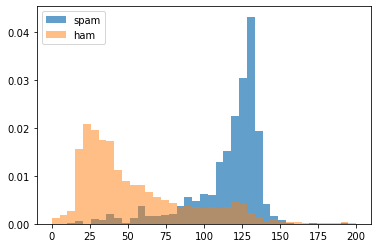

In [93]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], 
            bins, alpha=0.7, label='spam', density=True)
pyplot.hist(data[data['label']=='ham']['body_len'], 
            bins, alpha=0.5, label='ham', density=True)
pyplot.legend(loc='upper left')
pyplot.show()

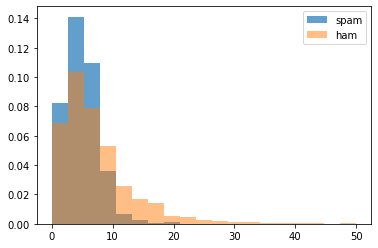

In [94]:
bins = np.linspace(0, 50, 20)

pyplot.hist(data[data['label']=='spam']['punct%'], 
            bins, alpha=0.7, label='spam', density=True)
pyplot.hist(data[data['label']=='ham']['punct%'], 
            bins, alpha=0.5, label='ham', density=True)
pyplot.legend(loc='upper right')
pyplot.show()

## Feature Transformations

In [95]:
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


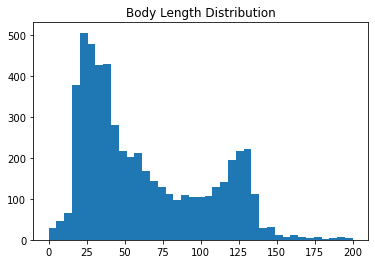

In [96]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()
# Bimodal distribution, but not too skewed so not great for transformation

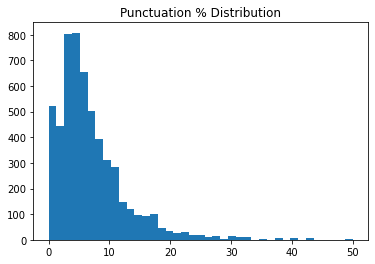

In [97]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()
# Very skewed - the model could learn bias, so it is good for transformation

## Box-Cox Power Transformations

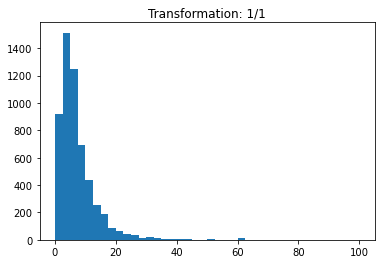

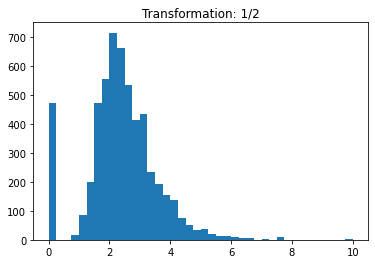

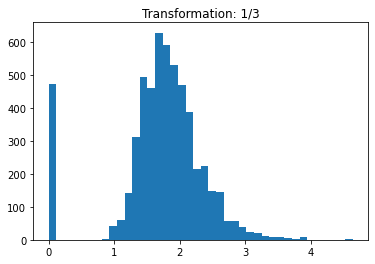

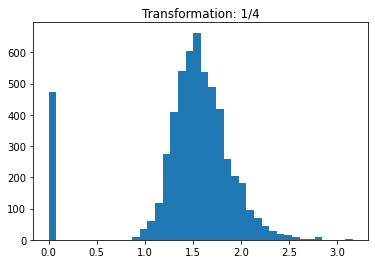

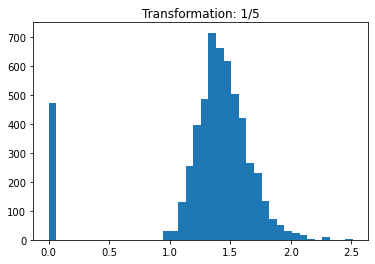

In [98]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40)
    pyplot.title('Transformation: 1/{}'.format(str(i)))
    pyplot.show()

## Cross-validation and evaluation metrics
**Evaluation Metrics:**
- Accuracy = Predicted correctly / Total observations
- Precision = Predicted as spam that are actaually spam (TP) / total predicted spam
- Recall = Predicted as spam that are actaually spam / total # that are actually spam


In [102]:
import re
import string
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [103]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Use of `KFolds` with `RandomForestClassifier`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [110]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, 
                X_features, 
                data['label'], 
                cv=k_fold, 
                scoring='accuracy', 
                n_jobs=-1)

array([0.97666068, 0.97935368, 0.97484277, 0.96675651, 0.97304582])

#### Explore `RandomForestClassifier` through the use of the holdout set

In [111]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, 
    data['label'], 
    test_size=0.2)


In [115]:
rf = RandomForestClassifier(n_estimators=50,
                       max_depth=20,
                       n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [118]:
sorted(zip(rf_model.feature_importances_, X_train.columns), 
       reverse=True)[0:10]

[(0.05233178663585017, 'body_len'),
 (0.044028490871719644, 2031),
 (0.0339428757626362, 1803),
 (0.030301517406764504, 7350),
 (0.027965734881436867, 5724),
 (0.026189855545730296, 6285),
 (0.020880307475864314, 4796),
 (0.019501639570986752, 3134),
 (0.01604421726947975, 7027),
 (0.015113919704015653, 6746)]

In [122]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, 
      y_pred, 
      pos_label='spam', 
      average='binary')

In [139]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), 
    round(recall, 3), 
    round((y_pred==y_test).sum() / len(y_pred), 3))
     )



Precision: 1.0 / Recall: 0.598 / Accuracy: 0.954


#### Grid search by changing hyper-parameters 

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, 
    data['label'], 
    test_size=0.2)

In [145]:
def train_rf(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est :{}, Depth: {} ----- Precision: {} / Recall: {} / Accuracy: {}'.format(
    n_est,
    depth, 
    round(precision, 3), 
    round(recall, 3), 
    round((y_pred==y_test).sum() / len(y_pred), 3))
     )


for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_rf(n_est, depth)
    

Est :10, Depth: 10 ----- Precision: 1.0 / Recall: 0.262 / Accuracy: 0.907
Est :10, Depth: 20 ----- Precision: 1.0 / Recall: 0.574 / Accuracy: 0.946
Est :10, Depth: 30 ----- Precision: 1.0 / Recall: 0.745 / Accuracy: 0.968
Est :10, Depth: None ----- Precision: 1.0 / Recall: 0.773 / Accuracy: 0.971
Est :50, Depth: 10 ----- Precision: 1.0 / Recall: 0.262 / Accuracy: 0.907
Est :50, Depth: 20 ----- Precision: 1.0 / Recall: 0.638 / Accuracy: 0.954
Est :50, Depth: 30 ----- Precision: 1.0 / Recall: 0.738 / Accuracy: 0.967
Est :50, Depth: None ----- Precision: 1.0 / Recall: 0.844 / Accuracy: 0.98
Est :100, Depth: 10 ----- Precision: 1.0 / Recall: 0.241 / Accuracy: 0.904
Est :100, Depth: 20 ----- Precision: 1.0 / Recall: 0.638 / Accuracy: 0.954
Est :100, Depth: 30 ----- Precision: 1.0 / Recall: 0.738 / Accuracy: 0.967
Est :100, Depth: None ----- Precision: 1.0 / Recall: 0.837 / Accuracy: 0.979


#### Grid Search with Cross Validation

In [146]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
from sklearn.model_selection import GridSearchCV

In [149]:
rf = RandomForestClassifier()
params = {'n_estimators': [10, 150, 300],
          'max_depth': [30, 60, 90, None]
         }
gs = GridSearchCV(rf, params, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', 
                                             ascending=False)[0:5]



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,60.807340,10.175278,0.496692,0.227096,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.978456,0.973944,0.968553,0.971249,0.973952,0.003735,1
8,62.572762,1.354666,0.758740,0.172745,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.978456,0.974843,0.968553,0.969452,0.973773,0.004082,2
10,33.774075,1.715366,0.432947,0.074992,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978456,0.976661,0.973046,0.968553,0.970350,0.973413,0.003718,3
7,29.647531,1.300892,0.408919,0.047145,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.974865,0.975763,0.975741,0.966757,0.970350,0.972695,0.003582,4
3,3.438926,0.258867,0.257657,0.036816,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.975763,0.973070,0.978437,0.964061,0.967655,0.971797,0.005262,5


In [150]:
rf = RandomForestClassifier()
params = {'n_estimators': [10, 150, 300],
          'max_depth': [30, 60, 90, None]
         }
gs = GridSearchCV(rf, params, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', 
                                             ascending=False)[0:5]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,35.062737,1.132712,0.463571,0.052169,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.973968,0.973944,0.967655,0.972147,0.972875,0.002982,1
8,67.897336,2.272007,0.659260,0.109814,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.976661,0.973046,0.966757,0.970350,0.972695,0.003804,2
7,34.128523,2.681888,0.418730,0.038215,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975763,0.973968,0.973046,0.967655,0.970350,0.972156,0.002850,3
11,51.628894,9.373959,0.434866,0.141628,None,300,"{'max_depth': None, 'n_estimators': 300}",0.976661,0.972172,0.972147,0.968553,0.968553,0.971617,0.002993,4
3,3.519264,0.074051,0.235627,0.021687,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.978456,0.968582,0.968553,0.964960,0.974843,0.971079,0.004871,5


In [151]:
# Ideas for furtehr testing: N-Grams? Include stopwords? Remove punctions? Params in vectorizer? Additional hyper-params in random forest?

In [152]:
# Also add Train Test split for model accuracy 

#### Gradient Boosting with Grid Search 

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
def train_gb(n_est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=n_est, 
                                   max_depth=max_depth,
                                   learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est :{}, Depth: {} ----- Precision: {} / Recall: {} / Accuracy: {}'.format(
    n_est,
    depth, 
    round(precision, 3), 
    round(recall, 3), 
    round((y_pred==y_test).sum() / len(y_pred), 3))
     )


    

In [170]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_gb(n_est, max_depth, lr)

/Users/dmitrymikhaylov/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est :50, Depth: None ----- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.873
Est :50, Depth: None ----- Precision: 0.944 / Recall: 0.716 / Accuracy: 0.959
Est :50, Depth: None ----- Precision: 0.91 / Recall: 0.787 / Accuracy: 0.963


/Users/dmitrymikhaylov/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est :50, Depth: None ----- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.873
Est :50, Depth: None ----- Precision: 0.929 / Recall: 0.83 / Accuracy: 0.97
Est :50, Depth: None ----- Precision: 0.9 / Recall: 0.83 / Accuracy: 0.967
Est :50, Depth: None ----- Precision: 1.0 / Recall: 0.007 / Accuracy: 0.874
Est :50, Depth: None ----- Precision: 0.914 / Recall: 0.83 / Accuracy: 0.969
Est :50, Depth: None ----- Precision: 0.901 / Recall: 0.837 / Accuracy: 0.968


/Users/dmitrymikhaylov/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est :50, Depth: None ----- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.873
Est :50, Depth: None ----- Precision: 0.907 / Recall: 0.83 / Accuracy: 0.968
Est :50, Depth: None ----- Precision: 0.893 / Recall: 0.83 / Accuracy: 0.966
Est :100, Depth: None ----- Precision: 0.949 / Recall: 0.525 / Accuracy: 0.936
Est :100, Depth: None ----- Precision: 0.965 / Recall: 0.78 / Accuracy: 0.969
Est :100, Depth: None ----- Precision: 0.935 / Recall: 0.823 / Accuracy: 0.97
Est :100, Depth: None ----- Precision: 0.94 / Recall: 0.667 / Accuracy: 0.952
Est :100, Depth: None ----- Precision: 0.929 / Recall: 0.83 / Accuracy: 0.97
Est :100, Depth: None ----- Precision: 0.936 / Recall: 0.83 / Accuracy: 0.971
Est :100, Depth: None ----- Precision: 0.936 / Recall: 0.73 / Accuracy: 0.96
Est :100, Depth: None ----- Precision: 0.938 / Recall: 0.858 / Accuracy: 0.975
Est :100, Depth: None ----- Precision: 0.944 / Recall: 0.837 / Accuracy: 0.973
Est :100, Depth: None ----- Precision: 0.902 / Recall: 0.78 / Accurac

#### GridSearchCV to evaluate Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
params = {
    'n_estimators':[100, 150],
    'max_depth':[7, 11, 15],
    'learning_rate':[0.1]
}

